<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Statistical trading and Reinforcement Learning</center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>strategies of NVIDIA stock prices</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Otimização de Estratégias Orientadas por Dados 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Rebeca Sampaio |  126628 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Bibliotecas para desenvolvimento do projeto</a></li>
    <li><a href="#2">Ticker Atribuído</a></li>
    <li><a href="#3">Extração de dados</a>
        <ol>
            <li><a href="#3.1">Transformação dos dados</a></li>
            <li><a href="#3.2">Gráficos úteis e Dashboard</a></li>
            <li><a href="#3.3">Cálculo das métricas</a></li>
                <ol>
                    <li><a href="#3.3.1">Retornos</a></li>
                    <li><a href="#3.3.2">Retornos médios esperados e risco</a></li>
                </ol>
        </ol>
    </li>
    <li><a href="#4">Estratégia Estatística de Trading</a>
        <ol>
            <li><a href="#4.1">Crossover de Média Móvel Exponencial (EMA)</a></li>
            <li><a href="#4.2">Modelo de Classificação (Machine Learning)</a></li>
        </ol>
    <li><a href="#5">Algoritmo de Reinforcement Learning de Trading</a>
        <ol>
            <li><a href="#5.1">Definição do environment</a></li>
            <li><a href="#5.2">Algoritmos de Q-learning:</a></li>
                <ol>
                    <li><a href="#5.2.1">Algoritmo 1</a></li>
                    <li><a href="#5.2.2">Algoritmo 2</a></li>
                </ol>
            <li><a href="#5.3">Fine-Tune Algoritmos</a></li>
        </ol>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Bibliotecas para desenvolvimento do projeto** 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# import talib as ta
import quantstats as qs
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import plotly.graph_objects as go
import mplfinance as mpf
from backtesting import Backtest, Strategy
import gymnasium as gym
from itertools import product
import gym_anytrading

\# Executar este comando na `powershell` para instalar as packages necessárias para elaboração do projeto
```powershell
pip install -r requirements.txt
```

# <a class='anchor' id='2'></a>

> # **2. Ticker Atribuído** 

<div style="text-align: center;">
    <img src="https://th.bing.com/th/id/R.952ab16c7380e16b9f269e04481fabfc?rik=AXlfeVuBYRP54w&pid=ImgRaw&r=0" style="width: 170px; margin-top: 30px;">
</div>

Fundada em 1993, a NVIDIA é uma empresa reconhecida como líder global em tecnologia de computação gráfica, inteligência artificial e soluções de computação acelerada. Desde o lançamento da sua primeira unidade de processamento gráfico (GPU) em 1999, a empresa transformou setores como entretenimento digital, ciência, saúde e automobilismo, posicionando-se como um dos principais impulsionadores da inovação tecnológica no século XXI. Nos últimos anos, a NVIDIA tem se destacado não apenas pela inovação tecnológica, mas também pelo bom desempenho no mercado financeiro, com o valor das suas ações, registando aumentos significativos. Esse crescimento está diretamente relacionado à forte expansão das GPUs de alto desempenho, fundamentais para os domínios da Inteligência Artificial, Cloud Computing e Machine Learning, além do papel essencial da empresa no desenvolvimento de soluções para data centers e tecnologias de ponta.

Este projeto tem como objetivo implementar estratégias estatíticas de trading e treinar um agente de Reinforcement Learning que aprenda a evolução dos stocks da NVIDIA entre o período homólogo de 2019 a 2024. Este agente autonomamente e indiretamente irá tentar perceber as razões por trás do aumento dos seus stocks; a adoção crescente de inteligência artificial nos diversos setores da indústria; as estratégias empresariais; os desafios enfrentados num cenário de constante evolução tecnológica e competitiva.

**NOTA**: Como foi mencionado, irão ser extraídos os dados entre 2019 e 2024, mas mais concretamente de dia 1 de janeiro de 2019 e 31 de outubro de 2024, data de atribuição do enunciado do projeto.

# <a class='anchor' id='3'></a>

> # **3. Extração de dados** 

In [25]:
ticker = "NVDA"
start_date = "2019-01-01" # Não há dia 1 de janeiro de 2019...
end_date = "2024-11-01" # para incluir também o dia 31 de outubro de 2024
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [26]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1469 non-null   float64
 1   (Close, NVDA)      1469 non-null   float64
 2   (High, NVDA)       1469 non-null   float64
 3   (Low, NVDA)        1469 non-null   float64
 4   (Open, NVDA)       1469 non-null   float64
 5   (Volume, NVDA)     1469 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.3 KB


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03,3.173996,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07,3.556146,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08,3.467614,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...
2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700


# <a class='anchor' id='3.1'></a>

> ## **3.1 Transformação de dados**

In [27]:
# see nulls in data
data.isnull().sum()

Price      Ticker
Adj Close  NVDA      0
Close      NVDA      0
High       NVDA      0
Low        NVDA      0
Open       NVDA      0
Volume     NVDA      0
dtype: int64

Após descarregarmos os dados no período indicado, verificamos que não há valores omissos nos 1468 dias/entradas do dataset. Vemos a existência de variavéis que correspondem a:

1. **Date**  
   - Representa a data da observação dos preços históricos (varia entre 01-01-2019 e 31-10-2024);

2. **Adj Close** (Adjusted Close)  
   - O preço ajustado de "fecho" da ação, considerando eventos como dividendos, splits e outras ações corporativas que afetam o valor da ação;

3. **Close**  
   - O preço de "fecho" da ação no final do dia, sem ajustes para eventos corporativos;

4. **High**  
   - O preço mais alto alcançado pela ação durante o dia;

5. **Low**  
   - O preço mais baixo alcançado pela ação durante o dia;

6. **Open**  
   - O preço inicial da ação no início do dia;

7. **Volume**  
   - O número total de ações negociadas durante o dia.

In [28]:
# transformar a data do indice 0para datetime e mostrar só até ao dia (sem horas)
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%Y-%m-%d')
data = data.reset_index() # retira-se o index para poder usar a data como coluna

In [29]:
# retirar o MultiIndex das colunas (sempre NVDA e Ticker)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(map(str, col)).strip() for col in data.columns]
data.columns = [col.replace(f"{ticker}", "").replace("Ticker", "").strip() for col in data.columns]
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
1,2019-01-03,3.173996,3.199750,3.379000,3.192250,3.344750,705552000
2,2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
3,2019-01-07,3.556146,3.585000,3.622250,3.410750,3.462500,709160000
4,2019-01-08,3.467614,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...,...
1464,2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
1465,2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700
1466,2024-10-29,141.240265,141.250000,142.259995,138.899994,140.289993,157593600
1467,2024-10-30,139.330399,139.339996,140.330002,136.809998,139.539993,179418100


# <a class='anchor' id='3.2'></a>

> ## **3.2 Gráficos úteis e Dashboard** 

Visualização de um gráfico com o matplotlib de High e Low com área entre os dois para ver flutuações mais evidentes.

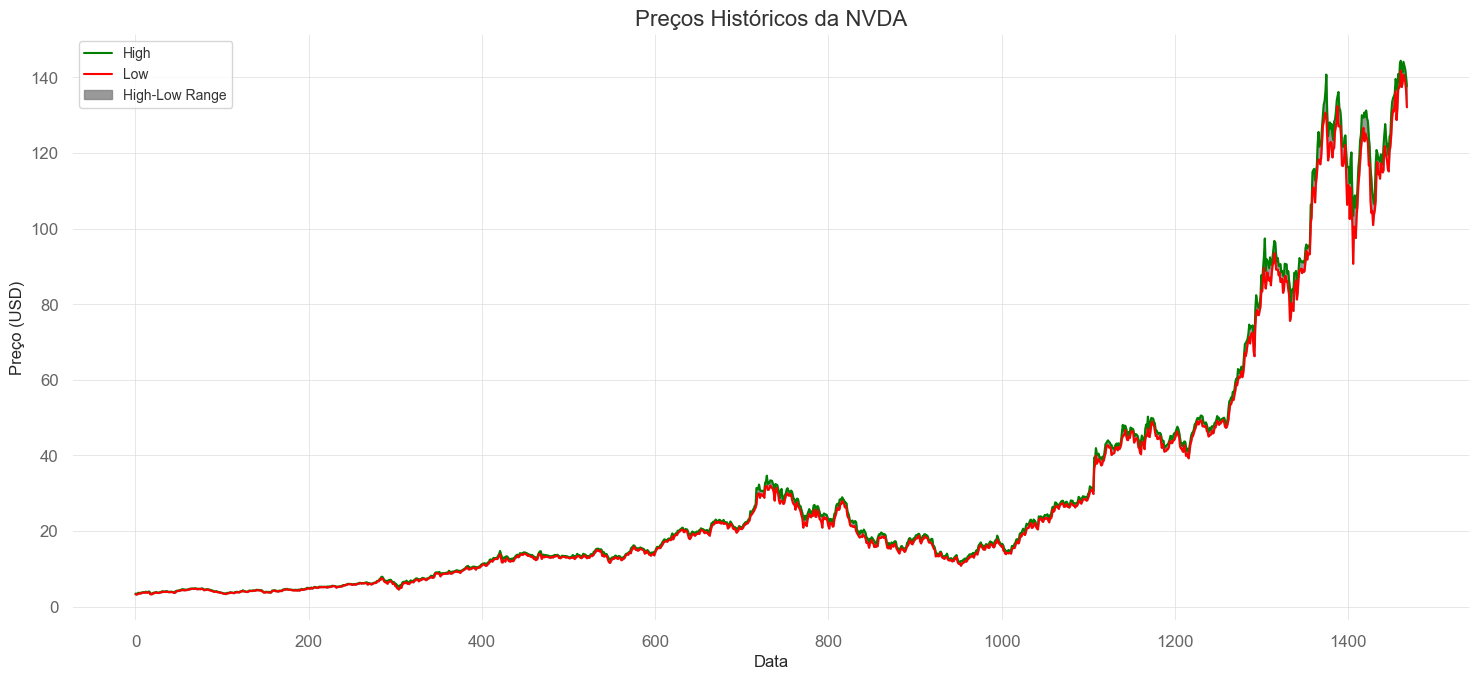

In [30]:
plt.figure(figsize=(15, 7))

# plt.plot(data.index, data['Adj Close'], label="Adj Close", color='blue')
# plt.plot(data.index, data['Close'], label="Close", color='orange')

# mostra apenas os dias de 1 a 1468 (2019-01-02 a 2024-10-31)
plt.plot(data.index, data['High'], label="High", color='green')
plt.plot(data.index, data['Low'], label="Low", color='red')
plt.fill_between(data.index, data['High'], data['Low'], color='grey', alpha=0.8, label='High-Low Range')

plt.title(f"Preços Históricos da {ticker}", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.legend(loc='upper left', fontsize=10)


# Exibir gráfico
plt.tight_layout()
plt.show()

Gráfico OHLC com plotly para ter uma interatividade a mais nas colunas apresentadas.

Foi inspirado nos links seguintes:
- https://plotly.com/python/ohlc-charts/
- https://dash.plotly.com/tutorial?utm_medium=graphing_libraries&utm_content=python_footer&_gl=1 (ver como se faz)


In [31]:
# TODO: ver este gráfico melhor

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)

fig.update_layout(
    title=dict(text=f'Gráfico OHLC da {ticker}'),
    yaxis=dict(title=dict(text='Preço (USD)')),
    # shapes = [dict(
    #    x0='2023-05-25', x1='2023-05-25', y0=0, y1=1, xref='x', yref='paper',
    #    line_width=2)],
    #annotations=[dict(
    #    x='2023-05-25', y=0.05, xref='x', yref='paper',
    #    showarrow=False, xanchor='left', text='AI Chip announcement')]
)

fig.show()

Foi realizado um dashboard que mostra algumas visualizações interativas dos stocks da NVIDIA para o período específico.

Esse ficheiro encontra-se em (assumindo que estamos em .\OEOD\notebooks):

```powershell
cd ..
cd .\src\
python dashboard_OEOD-Grupo7.py
```

# <a class='anchor' id='3.3'></a>

> ## **3.3. Cálculo das métricas** 

# <a class='anchor' id='3.3.1'></a>

> ### **3.3.1 Retornos** 

Taxa de return entre o dia anterior e presente.

Transforma-se a Data em index outra vez para podermos ter uma referência mais correta da data e do retorno nesse dia versus dia anterior.

In [32]:
data.set_index('Date', inplace=True)
returns = data["Close"].pct_change() # mudar o intervalo de datas para não ter omissos maybe; está FEITO mas ter cuidado!!!
returns

Date
2019-01-02         NaN
2019-01-03   -0.060417
2019-01-04    0.064068
2019-01-07    0.052941
2019-01-08   -0.024895
                ...   
2024-10-25    0.008048
2024-10-28   -0.007206
2024-10-29    0.005195
2024-10-30   -0.013522
2024-10-31   -0.047223
Name: Close, Length: 1469, dtype: float64

# <a class='anchor' id='3.3.2'></a>

> ### **3.3.2 Retornos médios esperados e risco** 

In [33]:
# daily risk free rate
rf = (1.02 ** (1/360))-1
# Calculate volatilities , expected returns and sharpe ratios.
volatility = returns.std() # volatility
exp_returns = returns.mean() # expected returns
sr = (exp_returns-rf)/volatility # Sharpe ratio

print(f"O return esperado é de: {exp_returns}")
print(f"O risco é de: {volatility}")
print(f"O Sharpe ratio é de: {sr}")

O return esperado é de: 0.0030362417534995365
O risco é de: 0.0329278427427735
O Sharpe ratio é de: 0.09053836189070488


<div style="font-size: 13px;">

| Métrica               | Fórmula                           | Valor          | Explicação                                                                                 |
|-----------------------|------------------------------------|----------------|-------------------------------------------------------------------------------------------|
| **Taxa Livre de Risco (rf)** | $rf = (1 + 0.02)^{\frac{1}{360}} - 1$ | `5.50088e-05` | Taxa de return diário sem risco, assumindo uma taxa anual de 2% e ajustada para 360 dias úteis. |
| **Volatilidade**       | $\sigma = \text{std}(\text{returns})$ | `0.032928`        | O desvio padrão dos returns diários, que indica a variabilidade ou risco do ativo.       |
| **Return Esperado**   | $\mu = \text{mean}(\text{returns})$ | `0.003036`        | A média dos returns diários, ou seja, o return esperado do ativo.                |
| **Sharpe Ratio (sr)**  | $SR = \frac{\mu - rf}{\sigma}$ | `0.090538`        | Medida de return ajustado ao risco, calculada como o excesso do return dividido pela volatilidade. |

</div>


In [34]:
# define function that compute CAGR
def cagr(start_value , end_value , num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
# example
start_value = float(data["Close"].iloc[0])
end_value = float(data["Close"].iloc[-1])
num_periods = len(data["Close"])
result = cagr(start_value , end_value , num_periods)
print(f"CAGR: {result}")

CAGR: 0.0024984505386265177


# <a class='anchor' id='4'></a>

> # **4. Estratégia Estatística de Trading** 

# <a class='anchor' id='4.1'></a>

> ## **4.1 Crossover de Média Móvel Exponencial (EMA)** 

Foi utilizado este método porque o preço de NVIDIA cresceu exponencialmente no período estudado e também porque queremos dar mais destaque aos dados mais recentes do período indicado. Há razões externas que levam à subida dos stocks da NVIDIA.
Links úteis:
- Ver conceitos do método de Média Móvel Exponencial: https://www.investopedia.com/terms/e/ema.asp
- Ver função ewn() do pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
- Ver aplicabilidades deste método (mini revisão-literatura):
    + https://www.investopedia.com/terms/g/goldencross.asp
    + https://www.forexstrategieswork.com/exponential-moving-average-indicator-stay-on-the-right-side-of-the-trend-with-the-ema-indicator/

<div style="text-align: center;">
    <img src="https://www.bing.com/images/blob?bcid=qPDJFPMqf9oHNQ" style="width: 500px; margin-top: 30px;">
</div>

In [63]:
# copy data para não alterar o original!!
data_plus = data.copy()

span_fast = 50
span_slow = 200

data_plus['EMA_Fast'] = data_plus['Close'].ewm(span=span_fast, adjust=False).mean() # pode ser ajustado entre 10 e 20
data_plus['EMA_Slow'] = data_plus['Close'].ewm(span=span_slow, adjust=False).mean() # TODO: pode-se ajustar isto entre 50 e 200

# estrategia de crossover
data_plus['Signal'] = np.where(data_plus['EMA_Fast'] > data_plus['EMA_Slow'], 1, 0) # 1 for buy, 0 for sell
data_plus['Position'] = data_plus['Signal'].diff()


data_plus['Crossover'] = None # começa vetor de nulos
data_plus['Crossover'] = np.where(
    (data_plus['EMA_Fast'] > data_plus['EMA_Slow']) & (data_plus['EMA_Fast'].shift(1) <= data_plus['EMA_Slow'].shift(1)),
    'fast_above',
    np.where(
        (data_plus['EMA_Slow'] > data_plus['EMA_Fast']) & (data_plus['EMA_Slow'].shift(1) <= data_plus['EMA_Fast'].shift(1)),
        'slow_above',
        None
    )
)
data_plus['Crossover'] = data_plus['Crossover'].astype('object')

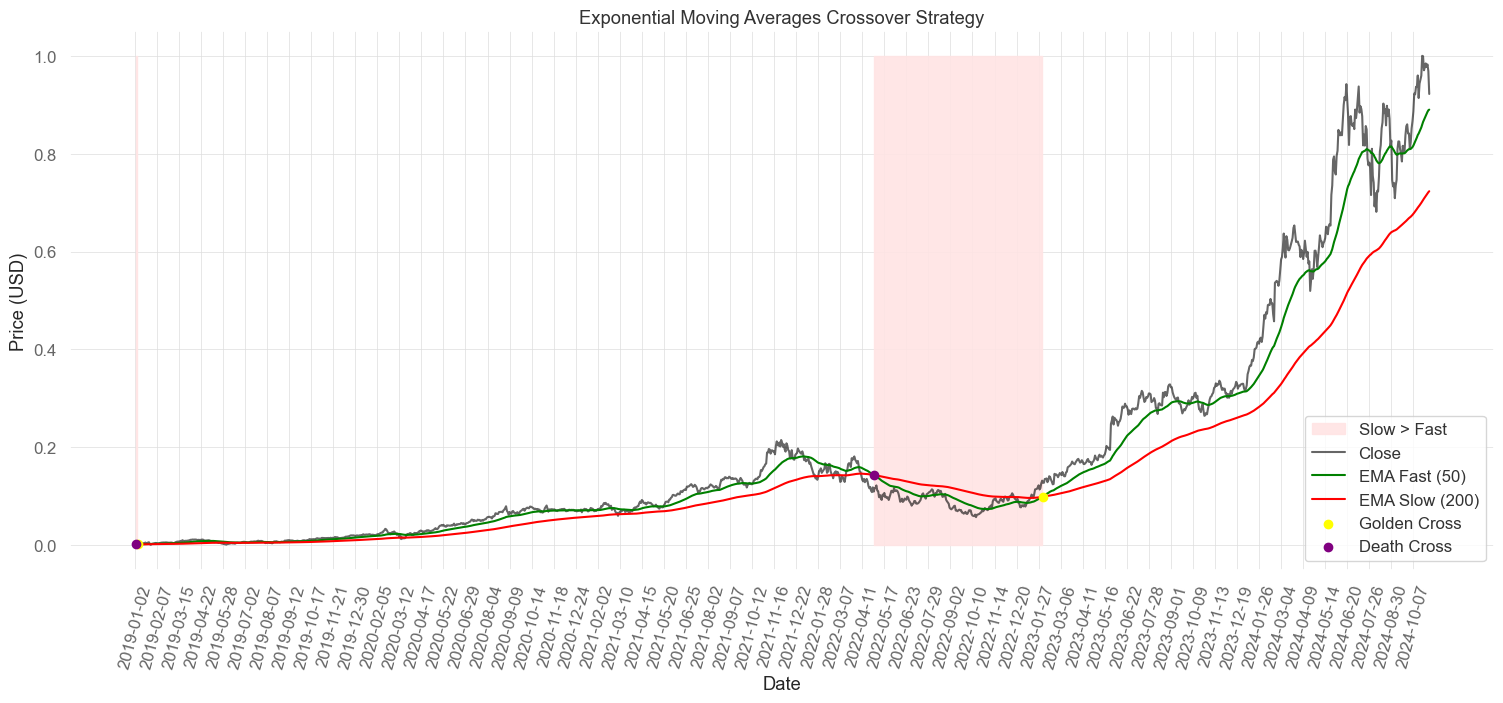

Cumulative Strategy Returns: 375.28


In [65]:
plt.figure(figsize=(15, 7))
'''
plt.fill_between(
    data_plus.index,
    data_plus['Close'].min(),
    data_plus['Close'].max(),
    where=data_plus['EMA_Fast'] > data_plus['EMA_Slow'],
    color='#E5FFE4',
    alpha=0.9,
    label='Fast > Slow'
)
'''
plt.fill_between(
    data_plus.index,
    0, data_plus['Close'].max(),
    where=data_plus['EMA_Slow'] > data_plus['EMA_Fast'],
    color='#FFE4E4',
    alpha=0.9,
    label='Slow > Fast'
)

########
plt.plot(data_plus['Close'], label="Close", color='black', alpha=0.6)
plt.plot(data_plus['EMA_Fast'], label=f"EMA Fast ({span_fast})", color='green')
plt.plot(data_plus['EMA_Slow'], label=f"EMA Slow ({span_slow})", color='red')
plt.scatter(
    data_plus.index[data_plus['Crossover'] == 'fast_above'],
    data_plus['EMA_Slow'][data_plus['Crossover'] == 'fast_above'],
    color='yellow',
    label='Golden Cross',
    zorder=5
)
plt.scatter(
    data_plus.index[data_plus['Crossover'] == 'slow_above'],
    data_plus['EMA_Slow'][data_plus['Crossover'] == 'slow_above'],
    color='purple',
    label='Death Cross',
    zorder=5
)
plt.title("Exponential Moving Averages Crossover Strategy")
plt.legend()

# para o eixo do x não ficar com tantos valores e com sobreposição
plt.xticks(ticks=data_plus.index[::25], labels=data_plus.index[::25], rotation=75) # ::35 intervalos de 35 em 35 dias
plt.tight_layout() 

plt.xlabel("Date") 
plt.ylabel("Price (USD)") 
plt.show()

# fazer backtest da estratégia
data_plus['Daily Returns'] = data_plus['Close'].pct_change() 
data_plus['Strategy Returns'] = data_plus['Daily Returns'] * data_plus['Signal'].shift(1) # "lag" de 1 dia 
cumulative_strategy_returns = (1 + data_plus['Strategy Returns']).cumprod()

print(f"Cumulative Strategy Returns: {cumulative_strategy_returns.iloc[-1]:.2f}")

In [40]:
data_plus

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03,3.173996,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07,3.556146,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08,3.467614,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...
2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700
2024-10-29,141.240265,141.250000,142.259995,138.899994,140.289993,157593600


# <a class='anchor' id='4.2'></a>

> ## **4.2 Modelo de Classificação (Machine Learning)** 

/# TODO

- A variável Target serão as três ações possíveis; ou seja, 1- Buy, 2- Sell, 3- Stay
- Que variáveis podem ser utilizadas para prever o Target?
- O `get_state_ML()` será obtido através do Predicted Signal?
- Fazer Backtest da estratégia

# <a class='anchor' id='5'></a>

> # **5. Algoritmo de Reinforcement Learning de Trading** 

# <a class='anchor' id='5.1'></a>

> ## **5.1 Definição do environment**

In [50]:
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()
# data['SMA_10'] = data['Close'].rolling(window=10).mean() # testes
# data['SMA_50'] = data['Close'].rolling(window=50).mean() # testes
prices = data['Close'].values

# scale the 3 variables above
scaler = MinMaxScaler()
data[['Close', 'EMA_50', 'EMA_200']] = scaler.fit_transform(data[['Close', 'EMA_50', 'EMA_200']])
data.dropna(inplace=True)
data

,Adj Close,Close,High,Low,Open,Volume,EMA_50,EMA_200
Date,,,,,,,,
2019-01-02,3.378090,0.001464,3.462000,3.251250,3.266000,508752000,0.000065,2.018511e-05
2019-01-03,3.173996,0.000000,3.379000,3.192250,3.344750,705552000,0.000000,0.000000e+00
2019-01-04,3.377346,0.001459,3.443250,3.242500,3.273500,585620000,0.000002,1.272851e-07
2019-01-07,3.556146,0.002742,3.622250,3.410750,3.462500,709160000,0.000061,1.793673e-05
2019-01-08,3.467614,0.002107,3.669500,3.422500,3.667250,786016000,0.000090,2.681308e-05
...,...,...,...,...,...,...,...,...
2024-10-25,141.530243,0.984556,144.130005,140.800003,140.929993,205122100,0.985989,9.864768e-01
2024-10-28,140.510315,0.977297,143.139999,140.050003,143.000000,173586700,0.990389,9.901130e-01
2024-10-29,141.240265,0.982492,142.259995,138.899994,140.289993,157593600,0.994846,9.937845e-01


In [51]:
# Define Q-learning parameters
num_states = 100  # Discretize state space
num_actions = 3  # 0 = Hold, 1 = Buy, 2 = Sell
q_table = np.zeros((num_states, num_actions))
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01

# Discretize states
def get_state_exponencial(row):
    '''
    return do int que tem os valores de EMA_10 e EMA_50 multiplicados por 10 (multiplicados por 10 porque é da escala)
    '''
    state = int(row['EMA_50'] * 10 + row['EMA_200'] * 10)
    return state

'''
def get_state(row):
    return int(row['SMA_10'] * 10 + row['SMA_50'] * 10)
'''

data['State'] = data.apply(get_state_exponencial, axis=1).astype(int)

# Initialize variables
initial_balance = 1000
balance = initial_balance
position = 0  # 1 if holding the currency, 0 otherwise
transaction_fee = 0.001  # 0.1% fee

# <a class='anchor' id='5.2'></a>

> ## **5.2 Algoritmos de Q-learning:**

# <a class='anchor' id='5.2.1'></a>

> ## **5.2.1 Algoritmo 1**

- Escolha do estado: $int(\text{EMA}(50)\times 10 + \text{EMA}(200)\times 10)$;
- Reward: o balanço atual - inicial;

In [52]:
# Training
for episode in tqdm(range(500), # Train for 500 episodes
                    desc="Training Agent", 
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}{postfix}]', 
                    colour='green', ncols=80):  
    
    balance = initial_balance
    position = 0
    for t in range(len(data) - 1):
        state = data.iloc[t]['State']
        state = int(state) # TODO: ver se é preciso // VERSÃO IMPORVISADA
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action
        next_state = data.iloc[t + 1]['State']
        next_state = int(next_state) # TODO: ver se é preciso // VERSÃO IMPORVISADA
        reward = 0
        if action == 1:  # Buy
            if position == 0:
                position = balance / prices[t]  # Buy currency
                balance -= position * prices[t] * (1 + transaction_fee)
        elif action == 2:  # Sell
            if position > 0:
                balance += position * prices[t] * (1 - transaction_fee)  # Sell currency
                position = 0
                reward = balance - initial_balance  # Profit or loss
        else:  # Hold
            reward = 0

        # Update Q-table
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)


Training Agent: 100%|████████████████████████████████████| 500/500 [01:01<00:00]


In [53]:
# Test the agent
print("Q-table:", q_table)

# Evaluate strategy
final_balance = balance + (position * prices[-1] if position > 0 else 0)
print(f"Initial balance: {initial_balance}")
print(f"Final balance: {final_balance}")

Q-table: [[ 69.63718424  68.19179306  89.28326503]
 [176.06301422 175.7237317  189.87334031]
 [163.87427412 167.19458241 176.52958455]
 [210.71917371 209.86272899 266.51925584]
 [449.52553826 447.90476758 451.11474122]
 [401.94817361 399.17298072 418.82387493]
 [340.0181618  338.73008223 370.81063954]
 [568.72228787 570.86974216 613.68008084]
 [771.96988298 769.66254679 817.19431324]
 [809.3340526  811.03247273 843.52483696]
 [735.03031911 732.23720023 755.10851896]
 [672.92313784 672.68507367 732.48187756]
 [755.15747255 752.20740646 827.08084348]
 [876.50389254 879.71337407 923.29013786]
 [782.90959132 783.68950269 837.13941714]
 [654.99288314 666.26133598 702.40043149]
 [554.12527368 551.18217518 580.62794827]
 [444.32657244 442.93901215 447.93870727]
 [340.30482186 357.04456988 454.14454249]
 [175.73722622 185.73417296 235.66809686]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.      

# <a class='anchor' id='5.2.2'></a>

> ## **5.2.2 Algoritmo 2**

- Escolha do estado: $int(\text{EMA}(50)\times 10 + \text{EMA}(200)\times 10)$;
- Reward: sharpe ratio;
- Hiperparâmetros mudados com os do fine-tune (secção 5.3) -> EMA(50,200);

In [59]:
##################################
## Hiperparâmetros da secção 5.3##
alpha = 0.5  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99
##################################

for episode in tqdm(range(500), # Train for 500 episodes
                    desc="Training Agent", 
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}{postfix}]', 
                    colour='green', ncols=80):  
    ##############################
    cumulative_returns = []
    balance = initial_balance
    position = 0
    ##############################
    for t in range(len(data) - 1):
        state = data.iloc[t]['State']
        state = int(state)
        
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Realizar ação
        next_state = data.iloc[t + 1]['State']
        next_state = int(next_state)
        reward = 0

        if action == 1:  # Buy
            if position == 0:
                position = balance / prices[t]
                balance -= position * prices[t] * (1 + transaction_fee)
        elif action == 2:  # Sell
            if position > 0:
                balance += position * prices[t] * (1 - transaction_fee)
                transaction_return = (balance - initial_balance) / initial_balance
                cumulative_returns.append(transaction_return)
                position = 0

                # Sharpe Ratio como Reward
                if len(cumulative_returns) > 1:
                    returns = np.array(cumulative_returns)
                    avg_return = returns.mean()
                    std_return = returns.std()
                    sharpe_ratio = (avg_return - rf) / std_return if std_return > 0 else 0
                    reward = sharpe_ratio

        # Atualizar Q-table
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )


Training Agent: 100%|████████████████████████████████████| 500/500 [01:11<00:00]


In [60]:
# Test the agent
print("Q-table:", q_table)

# Evaluate strategy
final_balance = balance + (position * prices[-1] if position > 0 else 0)
print(f"Initial balance: {initial_balance}")
print(f"Final balance: {final_balance}")

Q-table: [[10.11568608 10.21592169  7.36012089]
 [ 5.18622138  7.66578301  8.35680207]
 [11.28350519  9.89113857 12.11754165]
 [ 9.71498754 10.20516216 10.83130737]
 [ 9.44650115  9.89622972 10.13034714]
 [ 8.5175637   9.39415342  9.99687394]
 [10.22474239 10.20019395 10.42022658]
 [10.17754142  9.96465253 10.13868551]
 [10.3719502  10.64087545 10.94489375]
 [10.7036086  10.86655919 11.57324294]
 [10.63085022 10.46742012 11.15254297]
 [10.89817568 11.26579974 12.19158015]
 [ 9.51756538 10.05601737 10.55479091]
 [ 8.7713425   8.75889933  9.81538962]
 [ 9.17777355  9.0993678   9.60130291]
 [ 9.32471188  9.33039139  9.72675132]
 [ 9.05505403  9.69534035 10.72150891]
 [ 8.72564449  8.67144713  9.26952463]
 [ 6.71915507  8.27722352  8.11496642]
 [ 5.75055377  5.65175975  3.51343029]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0

# <a class='anchor' id='5.3'></a>

> ## **5.3 Fine-Tune Algoritmos**

--------------------------------------------------------------------------------------------------------------------
#### EMA(fast,slow) = (10,70)

Grid Search: 100%|██████████| 36/36 [18:00<00:00, 30.02s/it]

```
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.5]            # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração
```


Top 5 Configurações de Hiperparâmetros:

- Alpha: 0.1, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1515.50, Sharpe Ratio: 3.37
- Alpha: 0.2, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 2335.11, Sharpe Ratio: 2.27
- Alpha: 0.1, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1267.52, Sharpe Ratio: 2.26
- Alpha: 0.5, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 2405.73, Sharpe Ratio: 2.09
- Alpha: 0.2, Gamma: 0.95, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1396.41, Sharpe Ratio: 2.03

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------
#### EMA(fast,slow) = (50,200)

Grid Search: 100%|██████████| 54/54 [35:58<00:00, 39.97s/it] 

```
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.7, 0.5]       # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração
```


Top 5 Configurações de Hiperparâmetros:

- Alpha: 0.5, Gamma: 0.95, Epsilon: 1.0, Epsilon Decay: 0.99, Final Balance: 2257.21, Sharpe Ratio: 4.07
- Alpha: 0.5, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1730.85, Sharpe Ratio: 3.52
- Alpha: 0.2, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.995, Final Balance: 1266.84, Sharpe Ratio: 3.33
- Alpha: 0.2, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1423.31, Sharpe Ratio: 3.18
- Alpha: 0.1, Gamma: 0.99, Epsilon: 0.7, Epsilon Decay: 0.995, Final Balance: 1689.74, Sharpe Ratio: 3.11

--------------------------------------------------------------------------------------------------------------------